In [54]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime

In [55]:
def getDataFromColcsv(source,statecolname,startcol,state):
    df =pd.read_csv(source)
    df = df.groupby(statecolname).get_group(state).sum()
    df = df[startcol:]
    df = df.reset_index()
    return df.to_numpy()

In [56]:
def TSPrediction(dataset, state, tStart, tEnd, pSize):
    '''
    dataset: a string represents the directory of .csv file 
    state(string)
    tStart(string): the first day of training 
    tEnd(string): the last day of training
    pSize: int, prediction size
    '''
    if dataset == 'time_series_covid19_confirmed_US.csv':
        df = getDataFromColcsv(dataset, 'Province_State', 10, state)
        table = pd.DataFrame(df[1:])
        
        firstDate = datetime.datetime.strptime(pd.to_datetime(table[0].to_numpy()[0]).strftime('%Y-%m-%d'), '%Y-%m-%d')
        startIndex = ((datetime.datetime.strptime(tStart, '%Y-%m-%d'))-firstDate).days
        endIndex = ((datetime.datetime.strptime(tEnd, '%Y-%m-%d'))-firstDate).days
        
        stateData = pd.DataFrame(table)
        stateData['y'] = stateData[1].diff(1)
        stateData = stateData[[0,"y"]]
        
        training = pd.DataFrame(stateData.iloc[startIndex:endIndex])
        training.rename({0:"ds"}, axis = 1, inplace = True)
        
        original = pd.DataFrame(stateData.iloc[startIndex:pSize+endIndex])
        original.rename({0:"ds"}, axis = 1, inplace = True)
        original.reset_index(drop=True)
    else:    
        table = pd.read_csv(dataset)
        casesByDate = table[['date','state','cases']]
        stateData = pd.DataFrame(casesByDate.loc[casesByDate['state']==state])
        stateData['y'] = stateData['cases'].diff(1)
        stateData = stateData[["date","y"]]

        firstDate = datetime.datetime.strptime(stateData['date'].to_numpy()[0], '%Y-%m-%d')
        startIndex = ((datetime.datetime.strptime(tStart, '%Y-%m-%d'))-firstDate).days
        endIndex = ((datetime.datetime.strptime(tEnd, '%Y-%m-%d'))-firstDate).days

        training = pd.DataFrame(stateData.iloc[startIndex:endIndex])
        training.rename({"date":"ds"}, axis = 1, inplace = True)
        
        original = pd.DataFrame(stateData.iloc[startIndex:pSize+endIndex])
        original.rename({"date":"ds"}, axis = 1, inplace = True)
        original.reset_index(drop=True)
    
    m = Prophet()
    m.fit(training)
    future = m.make_future_dataframe(periods = pSize)
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    fig1 = m.plot(forecast) # plot predictions and origin data
    
    prediction = forecast[['ds','yhat']]
    
    comparison = prediction.set_index('ds').join(original.set_index('ds'))
    
    comparison.plot()
    
    sum_comparison = comparison.cumsum()
    sum_comparison.plot()
    
    return comparison

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-03-01,-1896.569550,0
2020-03-02,-2013.607577,1
2020-03-03,-1719.379544,1
2020-03-04,-660.786391,9
2020-03-05,-144.391307,12
...,...,...
2020-05-10,18082.460331,2273
2020-05-11,17965.420584,1660
2020-05-12,18259.646895,1430


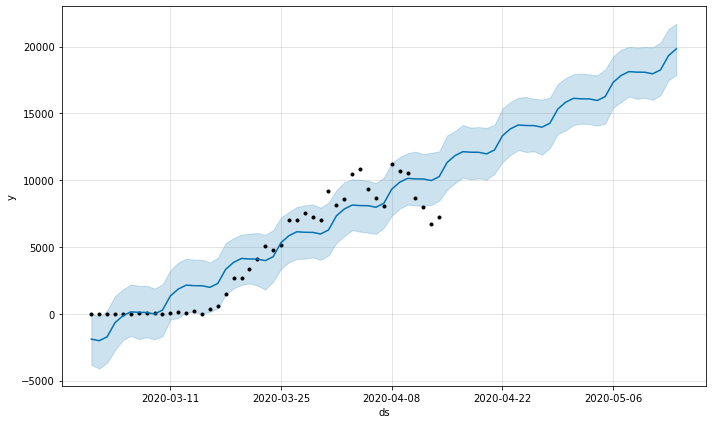

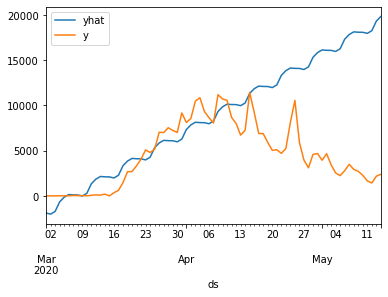

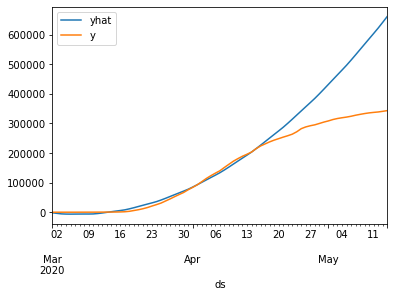

In [66]:
TSPrediction('time_series_covid19_confirmed_US.csv','New York', '2020-03-01', '2020-04-15', 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-03-01,-2632.024818,NaN
2020-03-02,-2004.804837,0.0
2020-03-03,-1983.780392,1.0
2020-03-04,-820.559387,9.0
2020-03-05,-587.758283,11.0
...,...,...
2020-05-10,18115.830716,2138.0
2020-05-11,18743.050696,1610.0
2020-05-12,18764.075141,1438.0


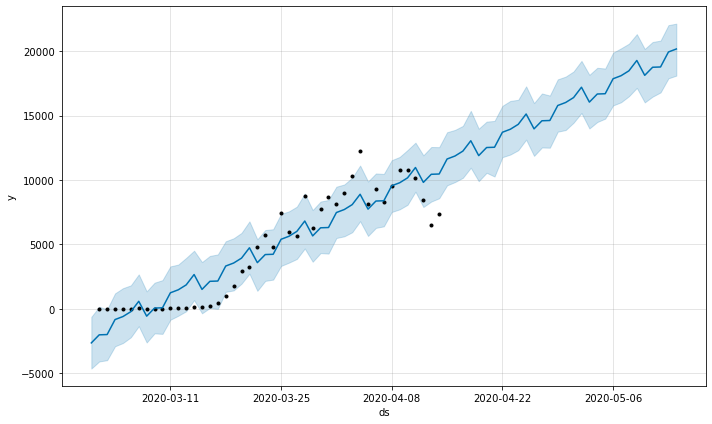

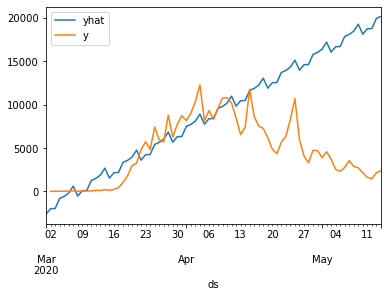

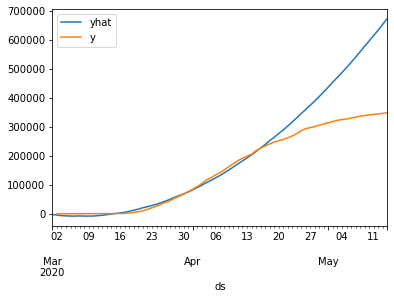

In [67]:
TSPrediction('covid-19-state-level-data.csv','New York', '2020-03-01', '2020-04-15', 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-02-24,-257.097601,0
2020-02-25,-263.665256,0
2020-02-26,-234.678140,0
2020-02-27,-234.913083,1
2020-02-28,-197.075376,0
...,...,...
2020-05-19,2618.034468,2246
2020-05-20,2647.023982,2254
2020-05-21,2646.791436,2038


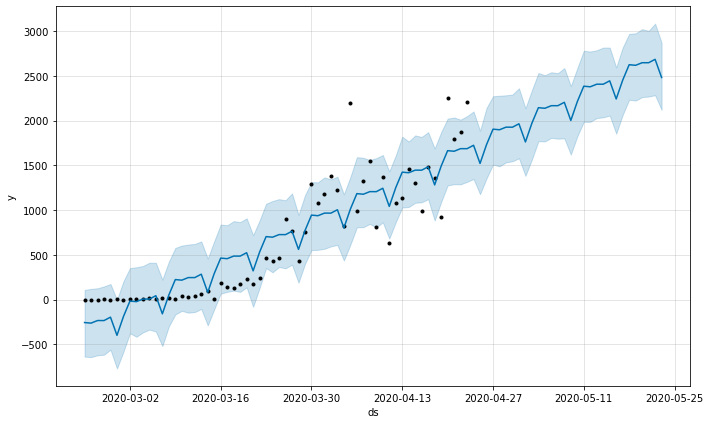

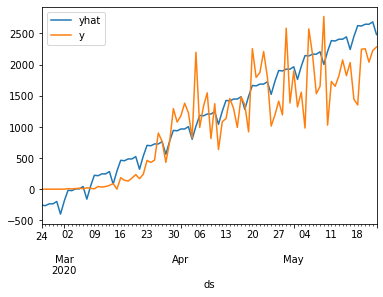

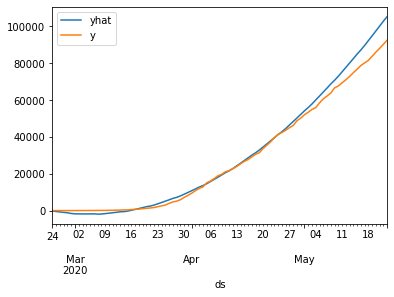

In [59]:
TSPrediction('time_series_covid19_confirmed_US.csv','California', '2020-02-24', '2020-04-24', 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-02-24,-257.855648,2.0
2020-02-25,-240.605226,0.0
2020-02-26,-207.959244,15.0
2020-02-27,-209.318900,0.0
2020-02-28,-203.115587,1.0
...,...,...
2020-05-19,2588.369962,2038.0
2020-05-20,2621.052621,2144.0
2020-05-21,2619.729642,2363.0


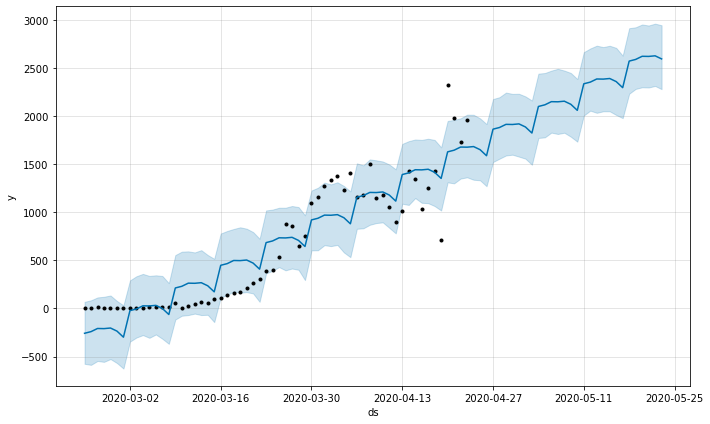

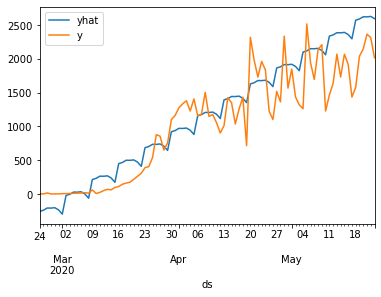

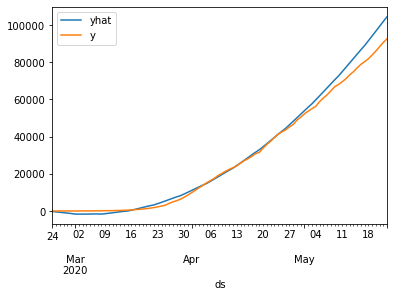

In [60]:
TSPrediction('covid-19-state-level-data.csv','California', '2020-02-24', '2020-04-24', 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-03-03,-76.869832,0
2020-03-04,-93.393802,0
2020-03-05,30.281135,3
2020-03-06,-72.102490,1
2020-03-07,1.176843,4
...,...,...
2020-05-06,2136.092683,1016
2020-05-07,2290.804362,1108
2020-05-08,2219.457478,1210


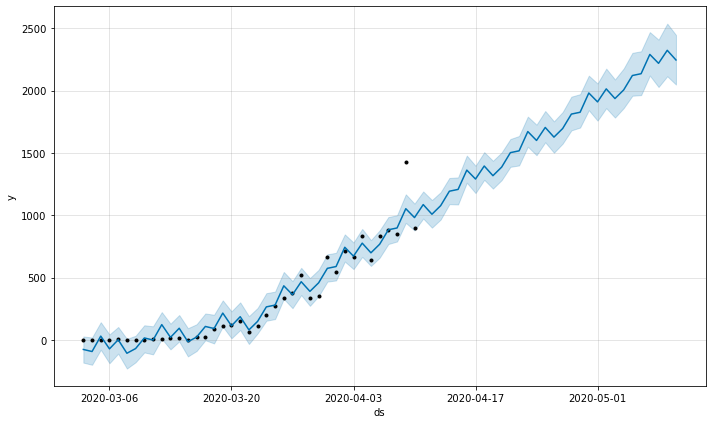

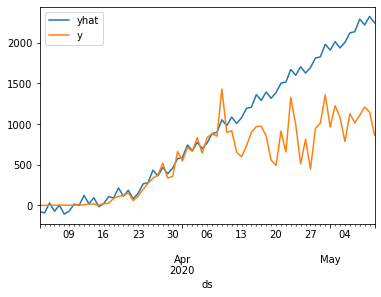

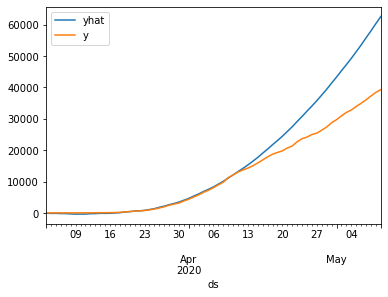

In [61]:
TSPrediction('time_series_covid19_confirmed_US.csv','Texas', '2020-03-03', '2020-04-11', 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-03-03,-264.908252,0.0
2020-03-04,-167.528064,1.0
2020-03-05,-92.984581,4.0
2020-03-06,-126.771480,3.0
2020-03-07,-136.435028,0.0
...,...,...
2020-05-06,1690.063571,1155.0
2020-05-07,1764.830722,1241.0
2020-05-08,1731.267492,1261.0


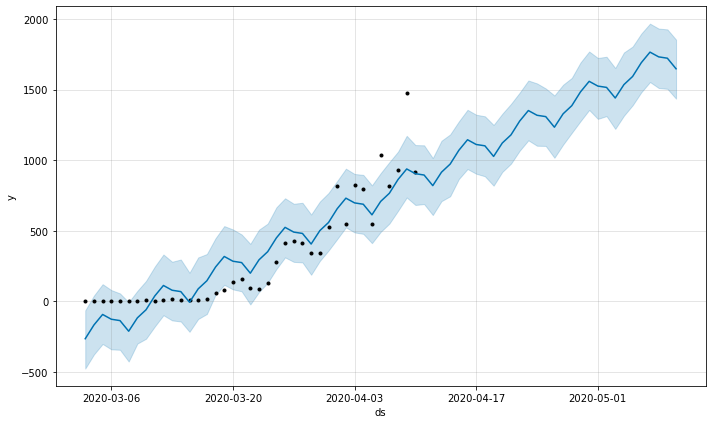

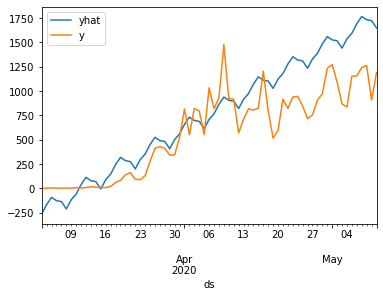

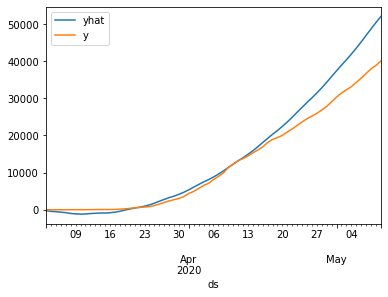

In [62]:
TSPrediction('covid-19-state-level-data.csv','Texas', '2020-03-03', '2020-04-11', 30)

# Train the model with the perioud during lockdown, extend the prediction to reopened period

## Phase 1 reopen June 8th

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,yhat,y
ds,,
2020-04-11,9356.397781,10160.0
2020-04-12,8206.497758,8435.0
2020-04-13,7068.752431,6548.0
2020-04-14,6963.433633,7402.0
2020-04-15,7917.454032,11755.0
...,...,...
2020-07-03,-2072.746623,919.0
2020-07-04,-1684.539051,725.0
2020-07-05,-2737.737953,536.0


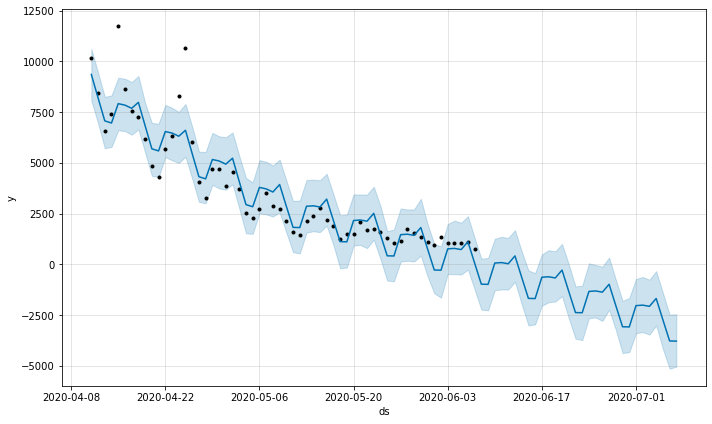

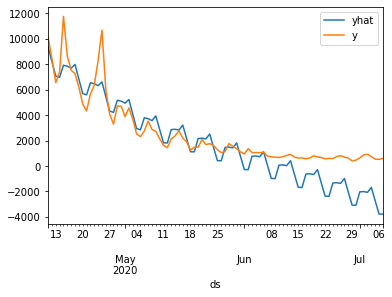

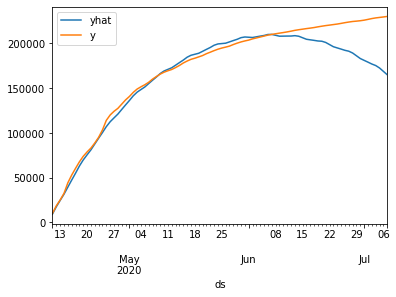

In [64]:
TSPrediction('covid-19-state-level-data.csv','New York', '2020-04-11', '2020-06-08', 30)